In [1]:
#!pip install --proxy http://one.proxy.att.com:8080 torch
#!pip install --proxy http://one.proxy.att.com:8080 torchvision

In [1]:
import torch
from torch import nn
from torch import optim
import torch.nn.functional as F
import numpy as np
import torchvision
from torchvision import datasets, transforms, models
import time
from torch.utils.data.sampler import SubsetRandomSampler

import matplotlib.pyplot as plt


In [3]:
data_dir = '/Users/sm912r/PycharmProjects/CV/pinnacle_buried_wire_usecase_train_test'
train_dir = data_dir + '/train'
valid_dir = data_dir + '/valid'
test_dir = data_dir + '/test'


train_transforms = transforms.Compose([transforms.RandomRotation(30),
                                         transforms.RandomResizedCrop(224),
                                         transforms.RandomHorizontalFlip(p = 0.6),
                                         transforms.RandomVerticalFlip(p = 0.4),
                                         transforms.ToTensor(),
                                         transforms.Normalize([0.485, 0.456, 0.406],
                                                              [0.229, 0.224, 0.225])])
test_transforms = transforms.Compose([transforms.Resize(255),
                                      transforms.CenterCrop(224),
                                      transforms.ToTensor(),
                                      transforms.Normalize([0.485, 0.456, 0.406],
                                                           [0.229, 0.224, 0.225])])
valid_transforms = transforms.Compose([transforms.Resize(255),
                                      transforms.CenterCrop(224),
                                      transforms.ToTensor(),
                                      transforms.Normalize([0.485, 0.456, 0.406],
                                                           [0.229, 0.224, 0.225])])

# TODO: Load the datasets with ImageFolder
train_data = datasets.ImageFolder(train_dir, transform=train_transforms)
test_data = datasets.ImageFolder(test_dir, transform=test_transforms)
valid_data = datasets.ImageFolder(valid_dir, transform=valid_transforms)

# TODO: Using the image datasets and the trainforms, define the dataloaders
trainloader = torch.utils.data.DataLoader(train_data, batch_size=64, shuffle=True)
testloader = torch.utils.data.DataLoader(test_data, batch_size=64)
validloader = torch.utils.data.DataLoader(valid_data, batch_size=64)


In [4]:
print(train_data.class_to_idx)
print(train_data.class_to_idx)
print(test_data.class_to_idx)

{'0-0-0-1': 0, '0-0-1-0': 1, '0-1-0-0': 2, '1-0-0-0': 3}
{'0-0-0-1': 0, '0-0-1-0': 1, '0-1-0-0': 2, '1-0-0-0': 3}
{'test_data': 0}


In [5]:
print(len(trainloader.dataset))
print(len(validloader.dataset))
print(len(testloader.dataset))

675
79
255


In [6]:
print(trainloader.dataset.classes)
print(validloader.dataset.classes)

['0-0-0-1', '0-0-1-0', '0-1-0-0', '1-0-0-0']
['0-0-0-1', '0-0-1-0', '0-1-0-0', '1-0-0-0']


In [7]:
print(len(trainloader.dataset))
print(len(validloader.dataset))

675
79


In [8]:
# DEEP LEARNING

In [9]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

In [10]:
model = models.resnet50(pretrained=True)
print(model)


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [11]:
for param in model.parameters():
    param.requires_grad = False

param

Parameter containing:
tensor([-9.0540e-03, -4.1489e-03, -2.0516e-02, -1.7642e-02,  9.6078e-03,
         5.8760e-03, -1.4448e-02,  7.1637e-04,  1.4057e-03, -1.6386e-03,
        -1.2073e-02, -9.3700e-03, -1.9250e-02, -1.7166e-02, -1.1226e-02,
        -1.6972e-02, -8.1289e-03, -1.3626e-02,  8.5068e-03, -1.7855e-02,
         6.9540e-03,  1.8412e-02, -2.4812e-03,  2.4328e-03, -1.3534e-03,
         4.8874e-03,  1.0521e-02, -8.0455e-04, -6.4342e-03, -1.1446e-02,
        -1.3326e-02, -9.2675e-03, -2.5020e-03, -4.5003e-03,  3.7125e-03,
        -2.4581e-02,  4.4222e-03, -8.4804e-03, -8.9190e-06, -1.7266e-03,
        -4.1818e-03,  2.4226e-03,  9.5379e-03, -6.6336e-03,  2.2586e-03,
         3.6322e-04,  2.7801e-02, -1.1270e-02, -1.5046e-02, -8.3841e-03,
         5.7193e-03, -1.5327e-02,  8.8598e-04,  2.3715e-02,  1.3557e-02,
         6.5433e-03,  1.3621e-02, -9.8292e-03,  7.2298e-03,  1.7554e-02,
         2.0959e-04,  4.3992e-03, -8.7419e-03,  9.7137e-03,  1.1456e-02,
         1.5336e-02, -6.9862e

In [12]:
# 4 for 4 classes

# model.fc = nn.Sequential(nn.Linear(2048, 512),
#                          nn.ReLU(),
#                          nn.Dropout(0.2),
#                          nn.Linear(512, 4),
#                          nn.LogSoftmax(dim=1))

model.fc = nn.Sequential(nn.Linear(2048, 1024),
                         nn.ReLU(),
                         nn.Dropout(0.2),
                         nn.Linear(1024, 512),
                         nn.ReLU(),
                         nn.Dropout(0.2),
                         nn.Linear(512, 256),
                         nn.ReLU(),
                         nn.Dropout(0.2),
                         nn.Linear(256, 4),
                         nn.LogSoftmax(dim=1))

print(model)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [13]:
criterion = nn.NLLLoss()
#optimizer = optim.Adam(model.fc.parameters(), lr=0.003)
optimizer = optim.Adam(model.fc.parameters(), lr=0.001)
model.to(device)


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [14]:
traintime = time.time()
print(traintime)

1600974578.8110561


In [15]:
epochs = 150
training_loss = 0

train_losses, valid_losses = [], []

for epoch in range(epochs):
    model.train()
    for images, labels in trainloader:

        # move the variables to GPU
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()

        logps = model(images)
        loss = criterion(logps, labels)
        loss.backward()
        optimizer.step()

        training_loss += loss.item()

    else:
        test_loss = 0
        accuracy = 0

        # turn of dropouts
        model.eval()

        with torch.no_grad():

            for images, labels in validloader:
                # move the variables to GPU
                images, labels = images.to(device), labels.to(device)

                start = time.time()

                logps = model(images)
                loss = criterion(logps, labels)
                test_loss += loss.item()

                # Calculate accuracy
                ps = torch.exp(logps)
                top_prob, top_class = ps.topk(1, dim=1)
                targets = labels.view(*top_class.shape)
                isEqual = top_class == targets
                accuracy += torch.mean(isEqual.type(torch.FloatTensor))

            train_losses.append(training_loss / len(trainloader))
            valid_losses.append(test_loss / len(validloader))

            print(f"Epoch {epoch+1}/{epochs}.. "
                  f"Train loss: {training_loss/len(trainloader):.3f}.. "
                  f"validation loss: {test_loss/len(validloader):.3f}.. "
                  f"Validation accuracy: {accuracy/len(validloader):.3f}")
            print(f"Device = {device}; Time per batch: {(time.time() - start)/len(validloader):.3f} seconds")

            training_loss = 0

            # switch back to training
            model.train()

print(f" \nTotal Time : {(time.time() - traintime)/60:.3f} minutes")

print("Training losses: ", train_losses)


Epoch 1/150.. Train loss: 2.827.. validation loss: 1.115.. Validation accuracy: 0.594
Device = cpu; Time per batch: 1.185 seconds
Epoch 2/150.. Train loss: 1.348.. validation loss: 1.117.. Validation accuracy: 0.576
Device = cpu; Time per batch: 1.247 seconds
Epoch 3/150.. Train loss: 1.198.. validation loss: 1.076.. Validation accuracy: 0.538
Device = cpu; Time per batch: 1.198 seconds
Epoch 4/150.. Train loss: 1.086.. validation loss: 0.970.. Validation accuracy: 0.677
Device = cpu; Time per batch: 1.253 seconds
Epoch 5/150.. Train loss: 1.007.. validation loss: 0.972.. Validation accuracy: 0.601
Device = cpu; Time per batch: 1.151 seconds
Epoch 6/150.. Train loss: 0.916.. validation loss: 0.821.. Validation accuracy: 0.740
Device = cpu; Time per batch: 1.095 seconds
Epoch 7/150.. Train loss: 0.872.. validation loss: 0.799.. Validation accuracy: 0.691
Device = cpu; Time per batch: 1.171 seconds
Epoch 8/150.. Train loss: 0.859.. validation loss: 0.648.. Validation accuracy: 0.826
Devi

Epoch 64/150.. Train loss: 0.664.. validation loss: 0.527.. Validation accuracy: 0.749
Device = cpu; Time per batch: 1.093 seconds
Epoch 65/150.. Train loss: 0.658.. validation loss: 0.592.. Validation accuracy: 0.706
Device = cpu; Time per batch: 1.122 seconds
Epoch 66/150.. Train loss: 0.721.. validation loss: 0.435.. Validation accuracy: 0.865
Device = cpu; Time per batch: 1.082 seconds
Epoch 67/150.. Train loss: 0.700.. validation loss: 0.613.. Validation accuracy: 0.742
Device = cpu; Time per batch: 1.080 seconds
Epoch 68/150.. Train loss: 0.687.. validation loss: 0.734.. Validation accuracy: 0.701
Device = cpu; Time per batch: 1.080 seconds
Epoch 69/150.. Train loss: 0.681.. validation loss: 0.470.. Validation accuracy: 0.857
Device = cpu; Time per batch: 1.140 seconds
Epoch 70/150.. Train loss: 0.673.. validation loss: 0.734.. Validation accuracy: 0.693
Device = cpu; Time per batch: 1.132 seconds
Epoch 71/150.. Train loss: 0.662.. validation loss: 0.478.. Validation accuracy: 0.

Epoch 127/150.. Train loss: 0.585.. validation loss: 0.518.. Validation accuracy: 0.824
Device = cpu; Time per batch: 1.106 seconds
Epoch 128/150.. Train loss: 0.568.. validation loss: 0.583.. Validation accuracy: 0.798
Device = cpu; Time per batch: 1.144 seconds
Epoch 129/150.. Train loss: 0.576.. validation loss: 0.569.. Validation accuracy: 0.806
Device = cpu; Time per batch: 1.091 seconds
Epoch 130/150.. Train loss: 0.618.. validation loss: 0.658.. Validation accuracy: 0.722
Device = cpu; Time per batch: 1.087 seconds
Epoch 131/150.. Train loss: 0.585.. validation loss: 0.501.. Validation accuracy: 0.781
Device = cpu; Time per batch: 1.090 seconds
Epoch 132/150.. Train loss: 0.640.. validation loss: 0.599.. Validation accuracy: 0.755
Device = cpu; Time per batch: 1.107 seconds
Epoch 133/150.. Train loss: 0.630.. validation loss: 0.649.. Validation accuracy: 0.734
Device = cpu; Time per batch: 1.101 seconds
Epoch 134/150.. Train loss: 0.588.. validation loss: 0.553.. Validation accu

In [16]:
torch.save(model, 'model_150_epoch_sep24.pth')

In [17]:
model=torch.load('model_150_epoch_sep24.pth')
#model

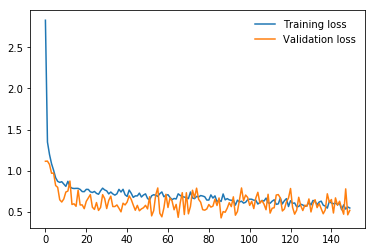

In [18]:
plt.plot(train_losses, label='Training loss')
plt.plot(valid_losses, label='Validation loss')
plt.legend(frameon=False)
plt.savefig('train_validation_loss.png')
plt.show()


In [23]:
testloader = torch.utils.data.DataLoader(test_data, batch_size=64)

test_classes = [label for _, label in test_data]

import collections
from collections import Counter

print("Test Data: ", Counter(test_classes))
print(len(testloader.dataset))


Test Data:  Counter({0: 255})
255


In [24]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model=torch.load('model_150_epoch_sep24.pth')
model.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [25]:
num_output_classes = len(trainloader.dataset.classes)
num_output_classes

4

In [26]:
trainloader.dataset.classes

['0-0-0-1', '0-0-1-0', '0-1-0-0', '1-0-0-0']

### Save the checkpoint
Now that your network is trained, save the model so you can load it later for making predictions. You probably want to save other things such as the mapping of classes to indices which you get from one of the image datasets: image_datasets['train'].class_to_idx. You can attach this to the model as an attribute which makes inference easier later on.

model.class_to_idx = image_datasets['train'].class_to_idx

Remember that you'll want to completely rebuild the model later so you can use it for inference. Make sure to include any information you need in the checkpoint. If you want to load the model and keep training, you'll want to save the number of epochs as well as the optimizer state, optimizer.state_dict. You'll likely want to use this trained model in the next part of the project, so best to save it now.

In [27]:
# TODO: Save the checkpoint 
checkpoint = {'pretrained_model_name' : "resnet50",
              'input_size' : 2048,
              'output_size' : 4,
              'hidden_layer' : 512,
              'model_state_dict': model.state_dict(),
              'optim_state_dict' : optimizer.state_dict(),
              'class_to_idx': trainloader.dataset.classes,
              'train_losses': train_losses,
              'valid_losses' : valid_losses}

torch.save(checkpoint, 'model_150_epoch_sep24_checkpoint')

model.to("cpu")
checkpoint = {'pretrained_model_name' : "resnet50",
              'input_size' : 2048,
              'output_size' : 4,
              'hidden_layer' : 512,
              'model_state_dict': model.state_dict(),
              'optim_state_dict' : optimizer.state_dict(),
              'class_to_idx': trainloader.dataset.classes,
              'train_losses': train_losses,
              'valid_losses' : valid_losses}

torch.save(checkpoint, 'model_150_epoch_sep24_checkpoint')
#model.to("cuda")

#train_data.class_to_idx

In [28]:
# TODO: Write a function that loads a checkpoint and rebuilds the model
def load_Checkpoint(filename):
    
    if torch.cuda.is_available():
        checkpoint = torch.load(filename)
    else:
        checkpoint = torch.load(filename,map_location='cpu')
        
    # get pre-trained model
    model1 = models.resnet50(pretrained=True)
    
    # freeze parameters - to prevent gradients and backprop
    for param in model1.parameters():
        param.requires_grad = False

    # TODO - this function should load for any architecture
    
    classifier = nn.Sequential(nn.Linear(2048, 512),
                               nn.ReLU(),
                               nn.Dropout(p=0.2),
                               nn.Linear(512, 4),
                               nn.LogSoftmax(dim=1)
                              )
    
                  
    model1.fc = classifier   
    
    
    model1.load_state_dict(checkpoint['model_state_dict'])
    
    model1.class_to_idx = checkpoint['class_to_idx']
    
    return model1

In [29]:
# test saving and loading
criterion = nn.NLLLoss()
new_model = load_Checkpoint('model_150_epoch_sep24_checkpoint')

In [30]:
new_model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [31]:
def process_image(image):
    ''' Scales, crops, and normalizes a PIL image for a PyTorch model,
        returns an Numpy array
    '''
    # TODO: Process a PIL image for use in a PyTorch model
    
    crop_size = 224
    new_width = 256
    # ImageNet mean and std    
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])

    # 1. Resize with shortest side 256 and maintain aspect ratio
    width, height = image.size
    orig_ar = width / height
    if width < height:
        new_width = 256
        new_height = new_width / orig_ar
    elif width > height:
        new_height = 256
        new_width = new_height * orig_ar
    else:
        new_width = new_height = 256
    image.thumbnail((new_width, new_height), Image.ANTIALIAS)

    # 2. center crop
    left = int((new_width - crop_size) / 2)
    top = int((new_height - crop_size) / 2)
    right = int((new_width + crop_size) / 2)
    bottom = int((new_height + crop_size) / 2)
    image = image.crop((left, top, right, bottom))
    
    # 3. PIL to nparray - 0-255
    np_image = np.array(image)
    # scale : 0 to 1 range
    np_image = np_image / 255.0
    
    # 4. Normalize the image
    np_image = (np_image - mean) / std

    # 5. re-order color channels
    out_image = np.transpose(np_image, (2, 0, 1))
    
    return out_image

In [32]:
def imshow(image, ax=None, title=None):
    """Imshow for Tensor."""
    if ax is None:
        fig, ax = plt.subplots()
    
    # PyTorch tensors assume the color channel is the first dimension
    # but matplotlib assumes is the third dimension
    image = image.numpy().transpose((1, 2, 0))
    
    # Undo preprocessing
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    image = std * image + mean
    
    # Image needs to be clipped between 0 and 1 or it looks like noise when displayed
    image = np.clip(image, 0, 1)
    
    ax.imshow(image)
    
    return ax

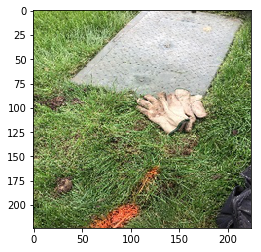

In [33]:
# test  - process_image()
from PIL import Image

image_path = '/Users/sm912r/PycharmProjects/CV/pinnacle_buried_wire_usecase_train_test/test/test_data/img_1.jpeg'
image = Image.open(image_path)

image_ndarray = process_image(image)
image_torch = torch.from_numpy(image_ndarray)
imshow(image_torch)

In [34]:
def predict(image_path, new_model, device, topk=10):
    ''' Predict the class (or classes) of an image using a trained deep learning model.
    '''
    
    # TODO: Implement the code to predict the class from an image file
    image = Image.open(image_path)

    image_ndarray = process_image(image)
    
    # turn off dropouts
    new_model.eval()
    
    new_model.to(device)

    # create a torch tensor of type float32
    image_torch = torch.from_numpy(image_ndarray).type(torch.FloatTensor)

    # reshape to incorporate batch size
    batch_t = torch.unsqueeze(image_torch, 0)
    
    logps = new_model(batch_t)
    ps = torch.exp(logps)
    top_prob, top_idx = ps.topk(topk,dim=1)
        
    # index to class mapping
    # idx_to_class = {value : key for key, value in new_model.class_to_idx.items()}
    
    # convert torch to numpy
    top_idx = top_idx.tolist()[0]
    # top_class = [ idx_to_class[entry] for entry in top_idx]
    top_class = []
    #print("top_idx: ", top_idx)
    # print("TOP INDEX: ", top_idx[0])
    return top_prob.tolist()[0], top_class, top_idx[0]
    

In [35]:
def view_classify(img, top_class, topk, cat_to_name):

    class_names = [ cat_to_name[item] for item in top_class]
    print(class_names)
    
    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)    
    ax1 = imshow(image_torch, ax = ax1)
    ax1.axis('off')
    
    
    y_pos = np.arange(topk)
    ax2.barh(np.arange(topk), list(reversed(top_prob)))
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(topk))
    ax2.set_yticklabels(reversed(class_names), size='small');
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)

    plt.tight_layout()

In [36]:
new_model.class_to_idx

['0-0-0-1', '0-0-1-0', '0-1-0-0', '1-0-0-0']

In [38]:
# test prediction
with torch.no_grad():   
    
    image_path = '/Users/sm912r/PycharmProjects/CV/pinnacle_buried_wire_usecase_train_test/test/test_data/img_1.jpeg' # pink primrose
    #image_path = '/Users/sm912r/Downloads/pinnacle_buried_wire_usecase_train_test/train/0-0-0-1/img_613.jpeg' #hard-leaved pocket orchid
    #image_path = '/Users/sm912r/PycharmProjects/CV/pinnacle_buried_wire_usecase_train_test/train/0-1-0-0/img_382.jpg' #morning glory
    #image_path = r'flowers/test/17/' + 'image_03830.jpg' # purple coneflower
    #image_path = r'flowers/test/74/' + 'image_01307.jpg' # rose
    #image_path = r'flowers/test/78/' + 'image_01903.jpg' # lotus lotus
    #image_path = r'flowers/test/18/' + 'image_04272.jpg' # peruvian lily * 4th
    #image_path = r'flowers/test/15/' + 'image_06351.jpg' # yellow iris * 5th
        
    topk = 4

    top_prob, top_class, top_idx = predict(image_path, new_model, device="cpu", topk=4)

    image = Image.open(image_path)
    image_ndarray = process_image(image)
    image_torch = torch.from_numpy(image_ndarray)
    #imshow(image_torch)

    print(top_prob)
    print(top_class)
    
    # view_classify(image_torch, top_class, topk, cat_to_name)
    
    print("\n\n ** prediction - results **")

    #class_names = [cat_to_name[item] for item in top_class]

    #print("Class name : ", class_names[0])
    #print("Class number : ", top_class[0])
    print("Probability : ", top_prob[0], "\n")
    print("{'0-0-0-1': 0, '0-0-1-0': 1, '0-1-0-0': 2, '1-0-0-0': 3}")

[0.49163684248924255, 0.27797409892082214, 0.22872047126293182, 0.0016685439040884376]
[]


 ** prediction - results **
Probability :  0.49163684248924255 

{'0-0-0-1': 0, '0-0-1-0': 1, '0-1-0-0': 2, '1-0-0-0': 3}


In [39]:
import os
test_names = os.listdir('/Users/sm912r/PycharmProjects/CV/pinnacle_buried_wire_usecase_train_test/test/test_data/')
#print(test_names)
print(len(test_names))

255


In [40]:
'/Users/sm912r/PycharmProjects/CV/pinnacle_buried_wire_usecase_train_test/test/test_data/' + test_names[0]

'/Users/sm912r/PycharmProjects/CV/pinnacle_buried_wire_usecase_train_test/test/test_data/img_163.jpeg'

In [42]:
# test prediction
with torch.no_grad():   
    topk = 4
    for i in range(len(test_names)):
        image_path = '/Users/sm912r/PycharmProjects/CV/pinnacle_buried_wire_usecase_train_test/test/test_data/' + test_names[i]
        print("Test data: ", test_names[i])
        top_prob, top_class, top_idx = predict(image_path, new_model, device="cpu", topk=4)
        image = Image.open(image_path)
        image_ndarray = process_image(image)
        image_torch = torch.from_numpy(image_ndarray)
        #print(top_prob)
        #print("\n\n ** prediction - results **")
        print("Probability : ", top_prob[0], "\n")
        
    print("{'0-0-0-1': 0, '0-0-1-0': 1, '0-1-0-0': 2, '1-0-0-0': 3}")

Test data:  img_163.jpeg
Probability :  0.9231977462768555 

Test data:  img_82.jpeg
Probability :  0.8732540607452393 

Test data:  img_358.jpeg
Probability :  0.831423282623291 

Test data:  img_2225.jpeg
Probability :  0.6032642126083374 

Test data:  img_319.jpeg
Probability :  0.9836742877960205 

Test data:  img_2272.jpeg
Probability :  0.9912912845611572 

Test data:  img_175.jpeg
Probability :  0.6674521565437317 

Test data:  img_94.jpeg
Probability :  0.9162430167198181 

Test data:  img_2004.jpg
Probability :  0.6364483833312988 

Test data:  img_362.jpeg
Probability :  0.6130183339118958 

Test data:  img_274.jpg
Probability :  0.9278711080551147 

Test data:  img_2212.jpg
Probability :  0.7366839647293091 

Test data:  img_323.jpeg
Probability :  0.7381139397621155 

Test data:  img_2161.jpeg
Probability :  0.5103697180747986 

Test data:  img_118.jpeg
Probability :  0.9796212911605835 

Test data:  img_303.jpeg
Probability :  0.5076966285705566 

Test data:  img_20.jpeg
P

KeyboardInterrupt: 

In [43]:
# test prediction
with torch.no_grad():   
    topk = 4
    for i in range(len(test_names)):
        image_path = '/Users/sm912r/PycharmProjects/CV/pinnacle_buried_wire_usecase_train_test/test/test_data/' + test_names[i]
        # print("Test data: ", test_names[i])
        top_prob, top_class, top_idx = predict(image_path, new_model, device="cpu", topk=4)
        image = Image.open(image_path)
        image_ndarray = process_image(image)
        image_torch = torch.from_numpy(image_ndarray)
        #print(top_prob)
        #print("\n\n ** prediction - results **")
        #print("Probability : ", top_prob[0], "\n")
        print(test_names[i],",", top_idx)
        
    print("{'0-0-0-1': 0, '0-0-1-0': 1, '0-1-0-0': 2, '1-0-0-0': 3}")

img_163.jpeg , 0
img_82.jpeg , 0
img_358.jpeg , 1
img_2225.jpeg , 3
img_319.jpeg , 1
img_2272.jpeg , 3
img_175.jpeg , 0
img_94.jpeg , 0
img_2004.jpg , 1
img_362.jpeg , 3
img_274.jpg , 3
img_2212.jpg , 1
img_323.jpeg , 1
img_2161.jpeg , 3
img_118.jpeg , 0
img_303.jpeg , 3
img_20.jpeg , 1
img_2045.jpeg , 3
img_342.jpeg , 0
img_2210.jpg , 3
img_179.jpeg , 0
img_276.jpg , 3
img_2.jpg , 2
img_289.jpg , 3
img_315.jpeg , 3
img_2012.jpg , 1
img_250.jpeg , 3
img_2069.jpeg , 3
img_2086.jpeg , 0
img_1995.jpeg , 2
img_2205.jpg , 3
img_2252.jpeg , 3
img_2317.jpeg , 0
img_339.jpeg , 1
img_2090.jpeg , 0
img_2359.png , 1
img_2188.jpg , 3
img_284.jpeg , 2
img_6.jpeg , 1
img_2029.jpeg , 1
img_2316.jpeg , 1
img_2195.jpeg , 3
img_154.jpeg , 0
img_2215.jpg , 3
img_2341.jpeg , 2
img_2068.jpeg , 0
img_2087.jpeg , 3
img_103.jpeg , 1
img_2002.jpg , 3
img_2290.jpeg , 3
img_266.jpg , 3
img_206.jpeg , 3
img_2228.jpeg , 3
img_2101.jpeg , 0
img_2176.jpg , 0
img_60.jpeg , 2
img_2140.jpeg , 0
img_119.jpeg , 0
img_217